`firefly/ntbks/multiple_datasets_tutorial.ipynb`

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import YouTubeVideo

A recording of this jupyter notebook in action is available at:

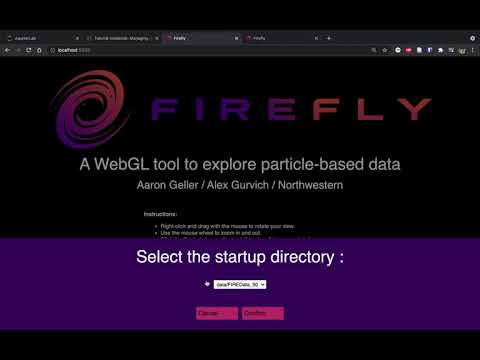

In [2]:
YouTubeVideo("TMq3IvnxGY8")

In [3]:
import numpy as np
import os

import sys
sys.path.insert(0,'/Users/agurvich/research/repos/firefly/src')
from firefly.data_reader import ArrayReader

# Tutorial notebook: Managing multiple datasets with Firefly
There are two ways to manage multiple datasets with Firefly
1. listing multiple entries in startup.json
2. creating a "standalone" iteration of Firefly

1 and 2 can be combined so that visitors to different "standalone" iterations of Firefly can select between different sets of multiple datasets using a dropdown see <a href="https://agurvich.github.io/firefly_versions">this example</a>.

## Editing the entries of `startup.json`
When the Firefly webapp starts up it looks for a `firefly/static/data/startup.json` file to tell it which dataset to display. If only a single entry is present then it will automatically begin loading that dataset. If multiple entries are listed then it will present the user with a dropdown box to select which dataset to load. See the <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/multiple_datasets.html">documentation for managing multiple datasets</a> for how to format the `startup.json` file to list multiple entries manually. We provide a method of easily adding datasets to the `startup.json` file using the `write_startup` keyword argument of the `firefly.data_reader.Reader` (sub-)class(es). 

In [4]:
## let's create some sample data, a grid of points in a 3d cube
my_coords = np.linspace(-10,10,20)
xs,ys,zs = np.meshgrid(my_coords,my_coords,my_coords)
xs,ys,zs = xs.flatten(),ys.flatten(),zs.flatten()
coords = np.array([xs,ys,zs]).T

## we'll pick some random field values to demonstrate filtering/colormapping
fields = np.random.random(size=xs.size)

We'll overwrite whatever file is existing with a new `startup.json` with only 1 entry in it. Then we'll append a second entry. Then we'll create a reader and specify that it should not be added to the `startup.json` file. 

In [5]:
## initialize an ArrayReader
reader = ArrayReader(
    coordinates=[coords[:-1],coords], ## pass in two particle groups as a demonstration (just copies of our sample data)
    fields=[[],[fields,fields]], ## field data for each particle group, 0 fields for 1 and 2 repeated fields for the other.
    write_startup=True) ## overwrite the existing startup.json file

## initialize a second ArrayReader
fake_reader = ArrayReader(
    coordinates=[coords[:-1],coords], ## pass in two particle groups as a demonstration (just copies of our sample data)
    fields=[[],[fields,fields]],## field data for each particle group, 0 fields for 1 and 2 repeated fields for the other.
    JSONdir="FakeData",
    write_startup='append') ## append this entry to the startup.json file if it doesn't already exists

## initialize a THIRD ArrayReader
null_reader = ArrayReader(
    coordinates=[coords[:-1],coords], ## pass in two particle groups as a demonstration (just copies of our sample data)
    fields=[[],[fields,fields]],## field data for each particle group, 0 fields for 1 and 2 repeated fields for the other.
    JSONdir="NullData",
    write_startup=False) ## do not add this reader to the startup.json file

JSONdir is None, defaulting to /Users/agurvich/research/repos/firefly/src/firefly/static/data/Data
Make sure each tracked_array (2) has a tracked_filter_flag (0), assuming True.
Make sure each tracked_array (2) has a tracked_colormap_flag (0), assuming True.
Outputting: PGroup_0 - 7999/7999 particles - 0 tracked fields
Outputting: PGroup_1 - 8000/8000 particles - 2 tracked fields
JSONdir: /Users/agurvich/FakeData -- is not a sub-directory of firefly/static/data. 
This may produce confusing or inoperable results. As such, we will create a symlink for you when you  dumpToJSON.
Make sure each tracked_array (2) has a tracked_filter_flag (0), assuming True.
Make sure each tracked_array (2) has a tracked_colormap_flag (0), assuming True.
Outputting: PGroup_0 - 7999/7999 particles - 0 tracked fields
Outputting: PGroup_1 - 8000/8000 particles - 2 tracked fields
JSONdir: /Users/agurvich/NullData -- is not a sub-directory of firefly/static/data. 
This may produce confusing or inoperable results.

/Users/agurvich/miniconda3/envs/firefly/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Let's read the content of the `startup.json` file:

In [6]:
!cat /Users/agurvich/research/repos/firefly/src/firefly/static/data/startup.json

{"0":"data\/Data","1":"data\/FakeData"}

Notice that the "NullData" `JSONdir` is not listed because we set `write_startup=False`. 

## Creating a standalone iteration of Firefly
You can copy the necessary Firefly source files by creating a `Reader` object containing your data and using the `copyFireflySourceToTarget`. 
We've also included a script that will automatically create a new Github repository and enable GitHub pages so that your data can be visited by users over the internet via URL. 
For instructions on how to configure this feature and details for copying the Firefly source see the <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/multiple_datasets.html">documentation for managing multiple datasets</a>.

In [7]:
reader.copyFireflySourceToTarget(init_gh_pages=False)

['/Users/agurvich/my_Firefly']

Let's read the contents of the new `my_Firefly` directory:

In [8]:
!ls /Users/agurvich/my_Firefly/

index.html static


In [9]:
!ls /Users/agurvich/my_firefly/static/data/

Data         startup.json
